In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [3]:
cc=pd.read_csv('../input/creditcardfraud/creditcard.csv')
cc.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


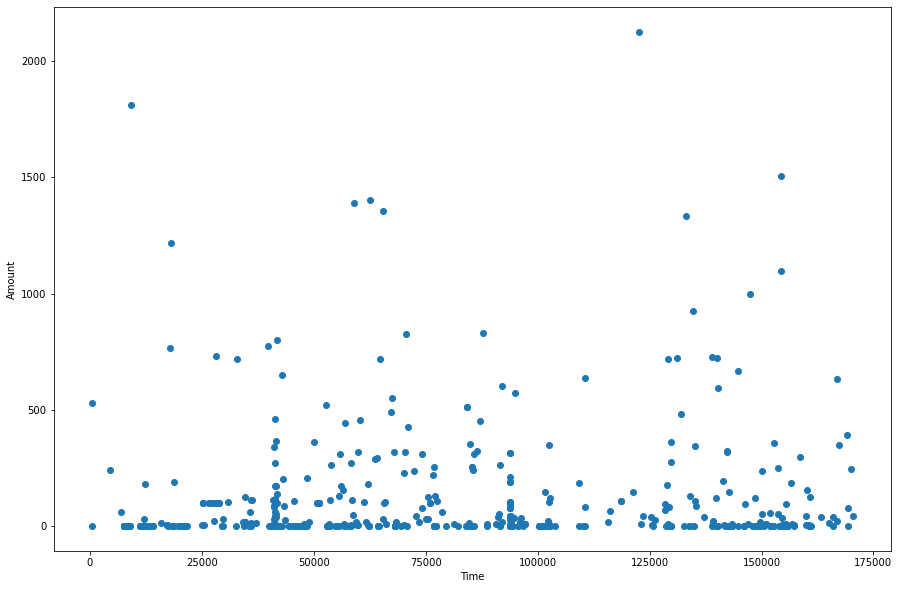

In [4]:
fraudCount = cc[cc['Class'] == 1] 
plt.figure(figsize=(15,10))
plt.scatter(fraudCount['Time'], fraudCount['Amount']) 
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()


In [5]:
FraudNum=len(cc[cc.Class==1])
print(FraudNum)
UnFraudNum=len(cc[cc.Class==0])
print(UnFraudNum)


492
284315


In [6]:
fraudData=cc[cc.Class==1]
equalsizeUnFraud=cc[cc.Class==0]
equalsizeUnFraud=equalsizeUnFraud.sample(500)

In [7]:
fraudData.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [8]:
equalsizeUnFraud.count()

Time      500
V1        500
V2        500
V3        500
V4        500
V5        500
V6        500
V7        500
V8        500
V9        500
V10       500
V11       500
V12       500
V13       500
V14       500
V15       500
V16       500
V17       500
V18       500
V19       500
V20       500
V21       500
V22       500
V23       500
V24       500
V25       500
V26       500
V27       500
V28       500
Amount    500
Class     500
dtype: int64

In [9]:
equalsizeUnFraud.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
99469,67132.0,-0.835517,1.234302,1.621424,0.771234,-0.234909,-0.479329,0.388570,0.247497,-0.810816,...,0.094635,0.201512,-0.202895,0.514942,-0.035865,-0.426943,-0.306911,-0.191972,2.50,0
98506,66688.0,-0.520306,1.073636,1.108388,-0.196455,0.400154,-0.001362,0.501490,0.209452,-0.534439,...,-0.191174,-0.541295,-0.026921,-0.366405,-0.238421,0.092425,0.120216,0.078812,2.69,0
98589,66719.0,1.173725,0.475507,0.922625,2.565809,-0.122435,0.182605,-0.070298,0.006309,-0.343798,...,-0.379646,-0.949285,0.076911,-0.132166,0.353001,-0.247732,0.022729,0.028952,7.57,0
198983,132746.0,2.065250,0.137865,-1.698164,0.417200,0.418748,-0.814603,0.157886,-0.201248,0.519855,...,-0.359670,-0.932086,0.352166,0.503291,-0.282627,0.176005,-0.060653,-0.031265,1.29,0
117606,74736.0,1.237926,-0.986169,1.191777,-0.443983,-1.751828,-0.066519,-1.246510,0.238426,-0.130099,...,-0.427462,-0.710264,0.125096,0.342134,-0.068359,0.943635,-0.020768,0.013227,29.88,0


In [10]:
new=equalsizeUnFraud.append(fraudData)
new=new.sample(frac=1)
new.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42609,41170.0,-6.498086,4.750515,-8.966558,7.098854,-6.958376,-2.822126,-10.333406,4.031907,-6.648778,...,2.158143,0.111510,0.216414,0.584661,0.760360,0.081972,1.415068,0.035124,83.38,1
73857,55311.0,-6.159607,1.468713,-6.850888,5.174706,-2.986704,-1.795054,-6.545072,2.621236,-3.605870,...,1.061314,0.125737,0.589592,-0.568731,0.582825,-0.042583,0.951130,0.158996,0.83,1
215984,140308.0,-4.861747,-2.722660,-4.656248,2.502005,-2.008346,0.615422,-3.485680,1.878856,-1.116268,...,1.138876,1.033664,-0.806199,-1.511046,-0.191731,0.080999,1.215152,-0.923142,592.90,1
156044,107117.0,2.036549,-0.030817,-1.750245,0.700130,0.527744,-0.792009,0.368268,-0.396805,1.756855,...,-0.184578,-0.227222,0.068095,0.545686,0.200718,0.316195,-0.127043,-0.070647,42.01,0
152019,96717.0,-3.705856,4.107873,-3.803656,1.710314,-3.582466,1.469729,-9.621560,-11.913105,-0.322297,...,-5.498772,2.941475,0.916236,-0.255504,-0.183835,-0.584539,-0.315484,-0.097223,1.00,1


In [11]:
X=new.drop(['Class'],axis=1)
X=np.asarray(X)
X[0:5]

array([[ 4.11700000e+04, -6.49808617e+00,  4.75051466e+00,
        -8.96655783e+00,  7.09885431e+00, -6.95837622e+00,
        -2.82212619e+00, -1.03334057e+01,  4.03190730e+00,
        -6.64877821e+00, -1.16344144e+01,  6.87757090e+00,
        -1.36976856e+01,  4.63040402e-01, -1.30441824e+01,
        -3.09229266e-01, -1.23175797e+01, -2.40190985e+01,
        -9.33519308e+00,  1.95189050e+00,  5.68338011e-01,
         2.15814308e+00,  1.11510363e-01,  2.16413836e-01,
         5.84661255e-01,  7.60359508e-01,  8.19723427e-02,
         1.41506751e+00,  3.51241448e-02,  8.33800000e+01],
       [ 5.53110000e+04, -6.15960693e+00,  1.46871292e+00,
        -6.85088815e+00,  5.17470627e+00, -2.98670392e+00,
        -1.79505415e+00, -6.54507153e+00,  2.62123614e+00,
        -3.60587013e+00, -8.12216107e+00,  6.02903256e+00,
        -9.22585531e+00, -1.54675863e+00, -1.03093342e+01,
         3.08062394e-01, -7.78732622e+00, -1.28221770e+01,
        -4.36767713e+00,  2.64398422e+00, -2.89829586e-

In [12]:
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X)

In [13]:
y=new['Class']
y=np.asarray(y)
y[0:5]



array([1, 1, 1, 0, 1])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (694, 30) (694,)
Test set: (298, 30) (298,)


In [15]:
from sklearn import svm
model=svm.SVC(kernel='linear',probability=True)
model.fit(X_train,y_train)

SVC(kernel='linear', probability=True)

In [16]:
yhat=model.predict(X_test)
yhat[0:5]

array([1, 0, 0, 1, 1])

In [17]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,yhat,labels=[1,0])
np.set_printoptions(precision=2)
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       141
           1       0.96      0.92      0.94       157

    accuracy                           0.94       298
   macro avg       0.94      0.94      0.94       298
weighted avg       0.94      0.94      0.94       298



In [18]:
confusion = pd.DataFrame(cm, index=['is Fraud', 'is Normal'],columns=['predicted fraud','predicted normal'])
confusion

,predicted fraud,predicted normal
is Fraud,145,12
is Normal,6,135
